In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_00d9598eb72045a398535be03dbc80cf = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kSM3y7IZK9OF3a45i_TyjlTLEr2D3z8GFw5orAr0CfMv',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_00d9598eb72045a398535be03dbc80cf.get_object(Bucket='churnnewproject-donotdelete-pr-qwa2hxcg7gzdpi',Key='Churn_Modelling.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
%matplotlib inline

In [2]:
#reading the csv file
#cus_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
df_data_1["Balance"] = df_data_1["Balance"].astype('int64')
df_data_1["EstimatedSalary"] = df_data_1["EstimatedSalary"].astype('int64')
df_data_1.dtypes

RowNumber           int64
CustomerId          int64
Surname            object
CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance             int64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary     int64
Exited              int64
dtype: object

In [4]:
#checking the null values
df_data_1.shape
print(" The number of null values is: ")
print(df_data_1.isnull().sum())

 The number of null values is: 
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


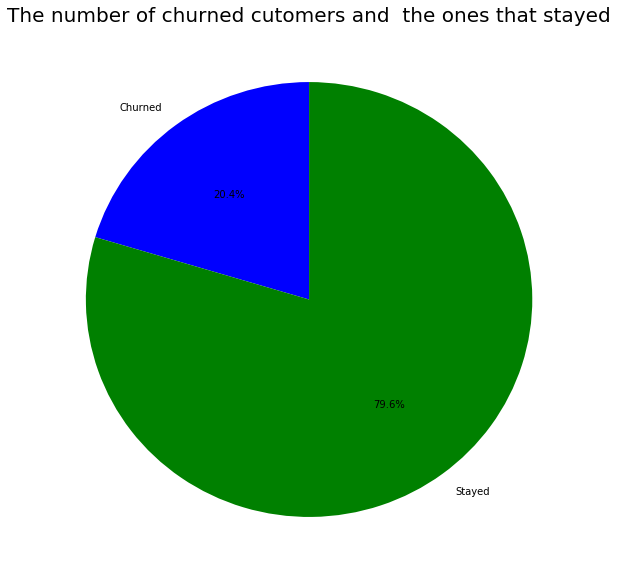

In [5]:
#visualisation
slices=  [df_data_1.Exited[df_data_1.Exited ==1].count(), 
          df_data_1.Exited[df_data_1.Exited == 0].count()]
slice_labels = ['Churned', 'Stayed']
colours = ['b', 'g']
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(slices, labels = slice_labels, colors = colours, startangle= 90, autopct='%.1f%%')
plt.title("The number of churned cutomers and  the ones that stayed", size = 20)
plt.show()

In [6]:
#creating a variable of categorical variables
cat_customers = df_data_1.select_dtypes(include = ['object']).copy()
print(cat_customers.head()) 
print(" The number of null values is: " , cat_customers.isnull().values.sum())

    Surname Geography  Gender
0  Hargrave    France  Female
1      Hill     Spain  Female
2      Onio    France  Female
3      Boni    France  Female
4  Mitchell     Spain  Female
 The number of null values is:  0


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


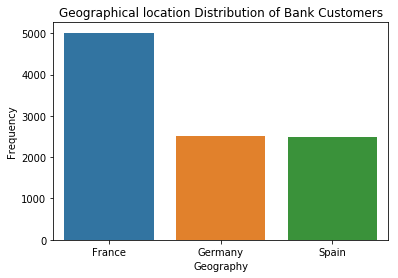

In [7]:
#Plotting graphs for categorical features

## 1. Plot for Geographical location

location_count = cat_customers['Geography'].value_counts()
sns.barplot(location_count.index, location_count.values)
plt.title('Geographical location Distribution of Bank Customers')
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Geography', fontsize=10)
plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


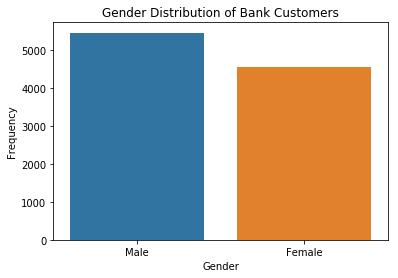

In [8]:
## 2. Plotting graph for Gender 

location_count = cat_customers['Gender'].value_counts()
sns.barplot(location_count.index, location_count.values)
plt.title('Gender Distribution of Bank Customers')
plt.ylabel('Frequency', fontsize=10)
plt.xlabel('Gender', fontsize=10)
plt.show()

RowNumber : 


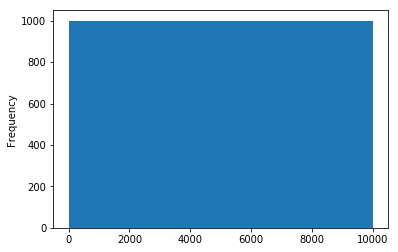

CustomerId : 


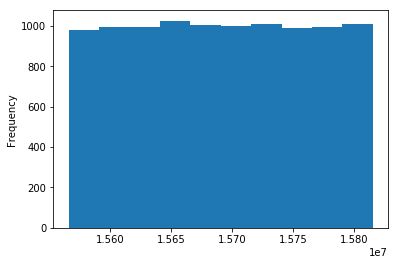

CreditScore : 


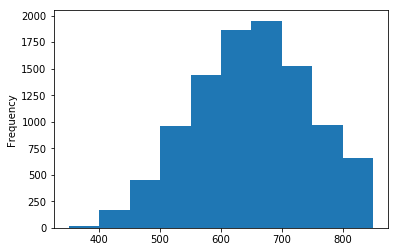

Age : 


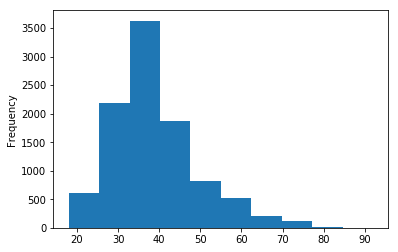

Tenure : 


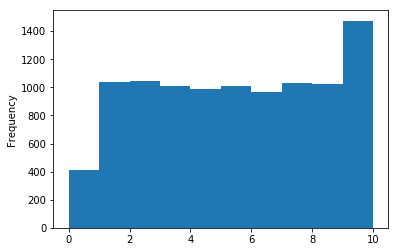

Balance : 


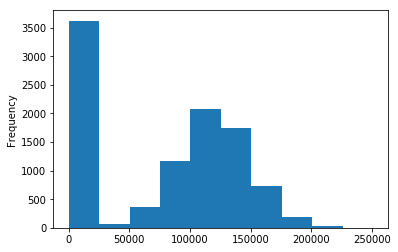

NumOfProducts : 


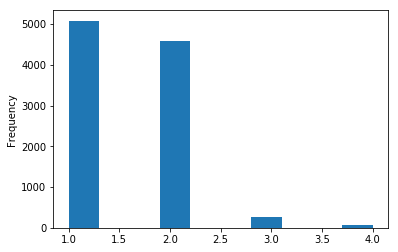

HasCrCard : 


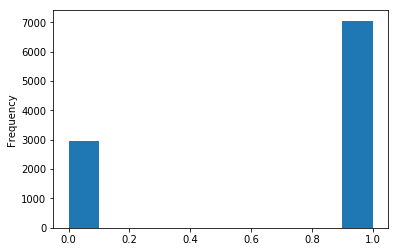

IsActiveMember : 


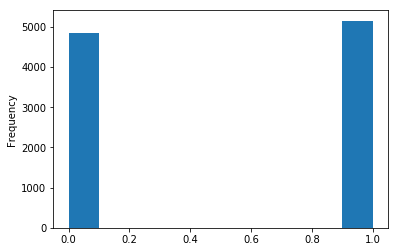

EstimatedSalary : 


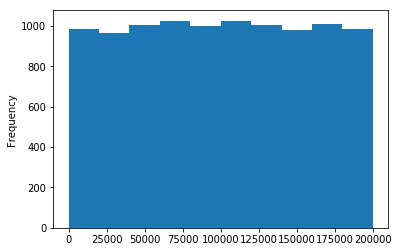

Exited : 


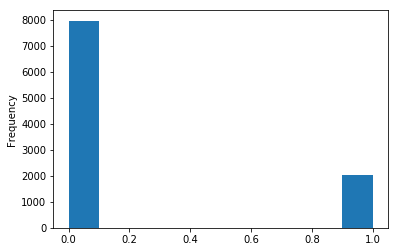

In [9]:
# visualizing the distributon of the the different predictor variables

def visual_exploratory(x):
    
    for var in x.select_dtypes(include = [np.number]).columns :
        print( var + ' : ')
        x[var].plot('hist')
        plt.show()
        
visual_exploratory(df_data_1)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


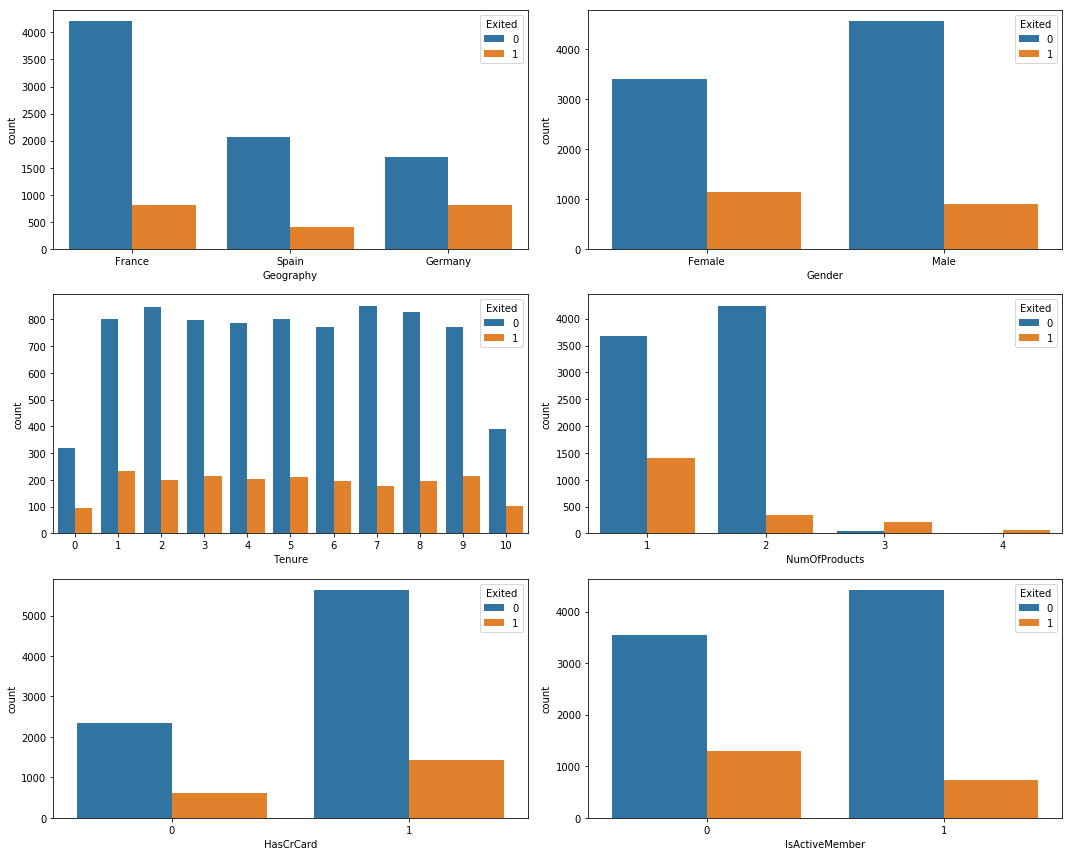

In [10]:
# using seaborn library for visualization
plot, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# extracting features with unique values that are between 2 and 49
nunique = df_data_1.nunique()

# array of categorical features
cat_features = [col for col in df_data_1.columns if nunique[col] >= 1 and nunique[col] < 50]

# array of non-categorical non_categorical
num_features = [col for col in df_data_1.columns if nunique[col] > 50]

# looping through the array of categorical features and plotting their counts with the target variable
for axis, catplot in zip(axes, df_data_1.dtypes[cat_features].index):
    sns.countplot(x=catplot, hue = 'Exited', data=df_data_1, ax=axis)   
plt.tight_layout()  
plt.show()  


In [11]:
#coverting gender into 0 or 1
from sklearn.preprocessing import LabelEncoder
new_cus_data=df_data_1.copy()

Gender = new_cus_data['Gender']
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Gender)
label_encoded =label_encoder.transform(Gender)
new_cus_data['Gender']=label_encoded

In [12]:
new_cus_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,0,42,2,0,1,1,1,101348,1
1,2,15647311,Hill,608,Spain,0,41,1,83807,1,0,1,112542,0
2,3,15619304,Onio,502,France,0,42,8,159660,3,1,0,113931,1
3,4,15701354,Boni,699,France,0,39,1,0,2,0,0,93826,0
4,5,15737888,Mitchell,850,Spain,0,43,2,125510,1,1,1,79084,0


In [13]:
temp_cus_data=new_cus_data.copy()
temp_cus_data = pd.get_dummies(temp_cus_data, columns=['Geography'], prefix = ['Geography'])
print(temp_cus_data.head())

   RowNumber  CustomerId   Surname  CreditScore  Gender  Age  Tenure  Balance  \
0          1    15634602  Hargrave          619       0   42       2        0   
1          2    15647311      Hill          608       0   41       1    83807   
2          3    15619304      Onio          502       0   42       8   159660   
3          4    15701354      Boni          699       0   39       1        0   
4          5    15737888  Mitchell          850       0   43       2   125510   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1           101348       1   
1              1          0               1           112542       0   
2              3          1               0           113931       1   
3              2          0               0            93826       0   
4              1          1               1            79084       0   

   Geography_France  Geography_Germany  Geography_Spain  
0                 1   

In [14]:
new_cus_data.insert(13, 'Geography_France' , temp_cus_data['Geography_France'])
new_cus_data.insert(14, 'Geography_Germany' , temp_cus_data['Geography_Germany'])
new_cus_data.insert(15, 'Geography_Spain' , temp_cus_data['Geography_Spain'])
print(new_cus_data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France       0   42   
1          2    15647311      Hill          608     Spain       0   41   
2          3    15619304      Onio          502    France       0   42   
3          4    15701354      Boni          699    France       0   39   
4          5    15737888  Mitchell          850     Spain       0   43   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       2        0              1          1               1           101348   
1       1    83807              1          0               1           112542   
2       8   159660              3          1               0           113931   
3       1        0              2          0               0            93826   
4       2   125510              1          1               1            79084   

   Geography_France  Geography_Germany  Geography_Spain  Exited  
0 

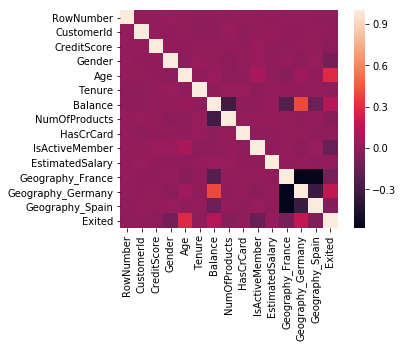

In [15]:
#generating corelation heat map
correlation = new_cus_data.corr()
sns.heatmap(correlation.T, square=True, annot=False, fmt="d", cbar=True)

In [16]:
# Deleting the Surname,rownumber,customerid feature from the dataset

new_cus_data.drop(["Surname","RowNumber", "CustomerId","Geography"], axis=1,inplace=True)

In [17]:
new_cus_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0,1,1,1,101348,1,0,0,1
1,608,0,41,1,83807,1,0,1,112542,0,0,1,0
2,502,0,42,8,159660,3,1,0,113931,1,0,0,1
3,699,0,39,1,0,2,0,0,93826,1,0,0,0
4,850,0,43,2,125510,1,1,1,79084,0,0,1,0


In [18]:
# Splitting feature data from the target
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data = new_cus_data.drop("Exited", axis=1)
target = new_cus_data["Exited"]
# Splitting feature data and target into training and testing
x_train, x_test, y_train, y_test = train_test_split(data, target)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Working with the model which gave the best accuracy
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
y_pred = model.fit(x_train, y_train).predict(x_test)
print("accuracy is:", accuracy_score(y_pred, y_test)*100, "%")

accuracy is: 86.0 %


In [21]:
#printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1922   76]
 [ 274  228]]


In [22]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-05-23 14:23:08,959 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [23]:
wml_credentials={"apikey": "oeF7hv61wOuGzRTOHFN36lcsbk5L65J09QtBjUAKokvO",
  "instance_id": "ce48286d-66bb-40f4-a3a4-474789936afe",
  "password": "7bc46b38-b05b-400f-b96c-b8520ae8576b",
  "url": "https://eu-gb.ml.cloud.ibm.com",
  "username": "5ae045a4-38ee-43fe-ba24-4d89b1b977dc"}


In [24]:
client =  WatsonMachineLearningAPIClient(wml_credentials)

In [25]:
model_props={client.repository.ModelMetaNames.AUTHOR_NAME:'Vamsi',
            client.repository.ModelMetaNames.AUTHOR_EMAIL:'krishnavamsipiniganti@gmail.com',
            client.repository.ModelMetaNames.NAME:'Churn_Modelling'}

In [26]:
model_artifact=client.repository.store_model(model,meta_props=model_props)

In [27]:
published_model_uid=client.repository.get_model_uid(model_artifact)

In [28]:
published_model_uid

'601f3095-21bc-4ad9-bd53-0121692223b9'

In [29]:
deploy=client.deployments.create(published_model_uid,name='Exited')



#######################################################################################

Synchronous deployment creation for uid: '601f3095-21bc-4ad9-bd53-0121692223b9' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='6f3176bc-b615-4f51-91b1-9c6ca24908cc'
------------------------------------------------------------------------------------------------




In [30]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)

In [31]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/ce48286d-66bb-40f4-a3a4-474789936afe/deployments/6f3176bc-b615-4f51-91b1-9c6ca24908cc/online'